![Picture title](image-20210826-194737.png)

# Introduction
Julia is a high-level and general-purpose language that can be used to write code that is fast to execute and easy to implement for scientific calculations. The language is designed to keep all the needs of scientific researchers and data scientists to optimize the experimentation and design implementation. [Julia (programming language)](https://en.wikipedia.org/wiki/Julia_(programming_language)).

> *“Julia was built for scientific computing, machine learning, data mining, large-scale linear algebra, distributed and parallel computing”-developers behind* [*the Julia language*](https://julialang.org/)*.*

## Overview

In this article, I will be discussing the advantages of Julia language and I will display how it’s easy to use DataFrame.jl, just like pandas in python. I will use simple examples and a few lines of code to demonstrate data manipulation and data visualization. We will be using the famous [Heart Disease UCI | Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci) Dataset which has a binary classification of Heart Disease based on multiple factors.

# Exploring Heart Disease Dataset

## Installing Julia packages

The method below will help you download and install all multiple libraries at once.

In [ ]:
import Pkg; Pkg.add(["CSV","CategoricalArrays",
"Chain", "DataFrames", "GLM", "Plots", "Random", "StatsPlots",
"Statistics","Interact", "Blink"])

## Importing Packages

We will be focusing more on loading data manipulation and visualization.

In [ ]:
using CSV
using CategoricalArrays
using Chain
using DataFrames
using GLM
using Plots
using Random
using StatsPlots
using Statistics

ENV["LINES"] = 20 # to limit nuber of rows.
ENV["COLUMNS"] = 20 # to limit number of columns

With the following lines we inform Jupyter notebook that we want data to be printed wide, but not overly tall:

In [ ]:
ENV["LINES"] = 20
ENV["COLUMNS"] = 1000

1000

## Loading Data

We are using the famous Heart Disease UCI | Kaggle dataset for our beginner-level data analysis.

**Features/Columns:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise-induced angina
10. oldpeak
11. the slope of the peak exercise ST segment
12. number of major vessels
13. thal: 3 to 7 where 5 is normal.

Simply use `CSV.read()` just like pandas `pd.read_csv()` and your data will be loaded as data frame.

In [ ]:
df_raw = CSV.read("/work/Data/Heart Disease Dataset.csv", DataFrame)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


> **For more Information on** [Comparison with Python/R/Stata · DataFrames.jl (juliadata.org)](https://dataframes.juliadata.org/stable/man/comparisons/)

Checking the shape of the dataframe

In [ ]:
size(df_raw)

(303, 14)

Checking multiple columns distribution. We can observe mean, min, max, and missing values all in one, by using `describe()`

In [ ]:
describe(df_raw)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,age,54.2013,34,55.0,77,0,Int64
2,sex,0.660066,0,1.0,1,0,Int64
3,cp,0.874587,0,1.0,3,0,Int64
4,trestbps,131.007,94,130.0,200,0,Int64
5,chol,251.627,141,248.0,564,0,Int64
6,fbs,0.128713,0,0.0,1,0,Int64
7,restecg,0.547855,0,1.0,2,0,Int64
8,thalach,150.29,71,155.0,192,0,Int64
9,exang,0.330033,0,0.0,1,0,Int64


## Data select

To convert columns into categorical types by using `:fbs => categorical => :fbs` and we have used `Between` to select multiple columns at once. The select function is simple, for selecting columns and manipulating the types.

In [ ]:
df = select(df_raw,:age,:sex => categorical => :sex,
            Between(:cp, :chol),
            :fbs => categorical => :fbs,:restecg,:thalach,
            :exang => categorical => :exang,
            Between(:oldpeak,:thal),
            :target => categorical => :target 
            )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,Int64,Cat…,Int64,Int64,Int64,Cat…,Int64,Int64,Cat…,Float64,Int64,Int64,Int64,Cat…
1,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
2,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
3,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
4,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
5,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
6,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
7,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
8,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
9,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


## Using Chain

If you want to apply multiple operations on your datasets all at once, I will suggest you to use `@chain` functionality, in R it’s equivalent to `%>%`.

- The `dropmissing` will remove missing values row from the database. We don’t have any missing values in our dataset, so this is simply for a showcase.
- The `groupby` function groups the data frame on a given column.
- The `combine` function merge the rows of a data frame by aggregation function.

> for more operations check out [Chain.jl](https://github.com/jkrumbiegel/Chain.jl) documentation

We have grouped the data frame by target and then combine five columns to get the mean values.

In [ ]:
@chain df_raw begin
    dropmissing
    groupby(:target)
    combine([:age, :sex, :chol, :restecg, :slope] .=> mean)
end

,target,age_mean,sex_mean,chol_mean,restecg_mean,slope_mean
,Int64,Float64,Float64,Float64,Float64,Float64
1,0,56.6277,0.824818,254.073,0.489051,1.14599
2,1,52.1988,0.524096,249.608,0.596386,1.62651


another way to use `groupby` and `combine` is by using `names(df, Real)` , which returns all the columns with real values.

In [ ]:
@chain df_raw begin
    groupby(:target)
    combine(names(df, Real) .=> mean)
end

,target,age_mean,cp_mean,trestbps_mean,chol_mean,restecg_mean,thalach_mean,oldpeak_mean,slope_mean,ca_mean,thal_mean
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,56.6277,0.518248,133.73,254.073,0.489051,138.65,1.68686,1.14599,1.16788,2.58394
2,1,52.1988,1.16867,128.759,249.608,0.596386,159.898,0.548795,1.62651,0.319277,2.06627


We can also add multiple columns using `groupby` and `combine` them by `nrows` which will display a number of rows for each **sub-group**.

In [ ]:
@chain df_raw begin
    groupby([:target, :sex])
    combine(nrow)
end

,target,sex,nrow
,Int64,Int64,Int64
1,0,0,24
2,0,1,113
3,1,0,79
4,1,1,87


We can also combine it and then unstack as shown below. So that one category becomes an **index**, and another becomes a **column**.

In [ ]:
@chain df_raw begin
    groupby([:target, :sex])
    combine(nrow)
    unstack(:target, :sex, :nrow)
end

,target,0,1
,Int64,Int64?,Int64?
1,0,24,113
2,1,79,87


## Groupby

The simple `groupby` function will show all groups at a time and to access specific group you need to use Julia hacks.

In [ ]:
gd = groupby(df_raw, :target)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64
1,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
2,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
3,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
4,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
5,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
6,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
7,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
8,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
9,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0


**we can use👇**

```
gd[(target=0,)] | gd[Dict(:target => 0)] | gd[(0,)]
```

to get a specific group that we are focusing on, this will help when we are dealing with multiple categories. `gd[1]` will show the first group where **target =0**.

In [ ]:
gd[1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64
1,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
2,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
3,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
4,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
5,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
6,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
7,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
8,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
9,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0


# Visualization

## Coorelation plot

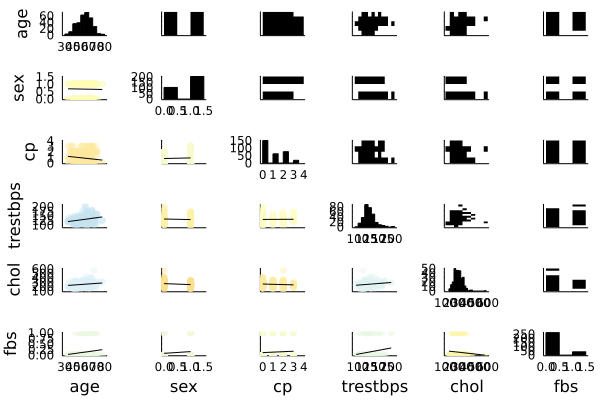

In [ ]:
@df df_raw corrplot(cols(1:6), grid = false)

## Multiple plots

You can plot multiple graphs on the same figure by using`**!**` at the end of the function name for example `boxplot!()`.

The example below shows **violin plot**, **boxplot**, and **dotplot** of cholesterol which is grouped by the target.

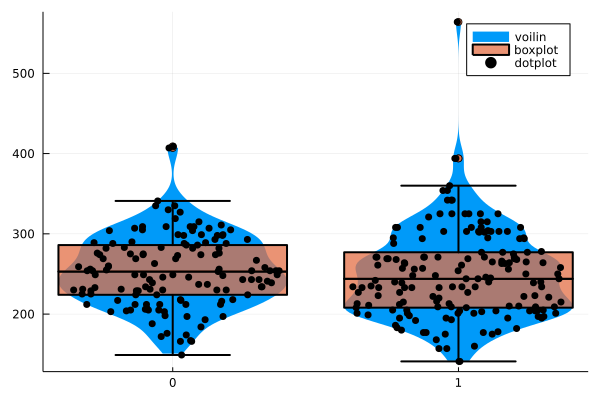

In [ ]:
@df df_raw violin(string.(:target), :chol, linewidth=0,label = "voilin")
@df df_raw boxplot!(string.(:target), :chol, fillalpha=0.75, linewidth=2,label = "boxplot")
@df df_raw dotplot!(string.(:target), :chol, marker=(:black, stroke(0)),label = "dotplot")

## Group Histogram

Similar to density plot we can use `grouphist` to plot histogram for different target categories.

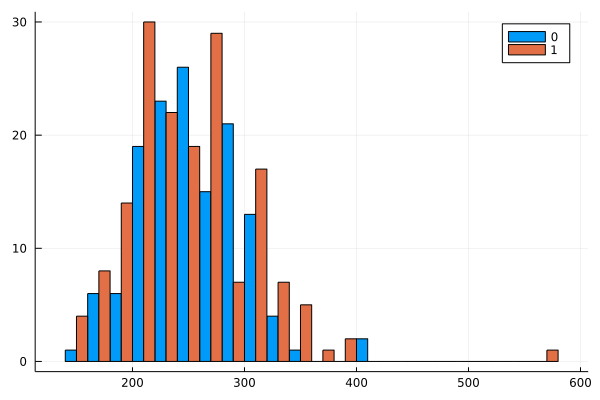

In [ ]:
@df df_raw groupedhist(:chol, group = :target, bar_position = :dodge)

## Andrews Plot

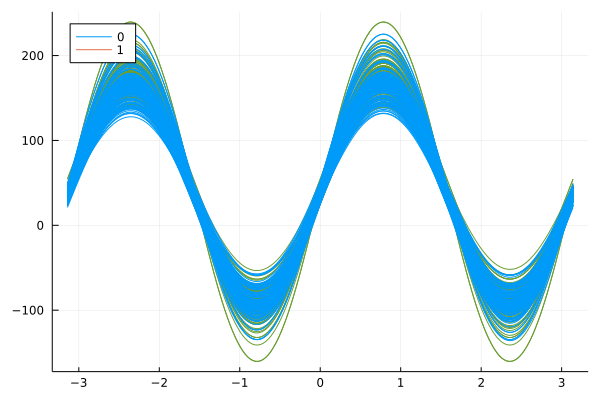

In [ ]:
@df df_raw andrewsplot(:target, cols(1:4), legend = :topleft)

## Density Plot

We will use [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl) package to plot graphs and charts. This package contains statistical recipes that extend the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) functionality. Just like seaborn with simple code, we can get our density plot with the separate groups are defined by colors.

We are going to group it by `target` column and display `cholesterol` , which display cholesterol distrubution.

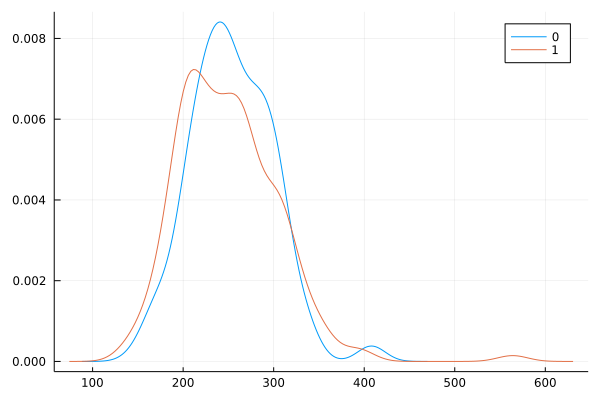

In [ ]:
@df df density(:chol, group=:target)

## Predictive Model

We will use the GLM model just like in **R** you can use `y~x` to train the model.

The example below has `x= trestbps, age, chol, thalach, oldpeak, slope, ca` and `y= target` which is binary. We are going to train our generalized linear model on binomial distribution to predict heart disease. As we can see our model is trained but it’s still need some tuning to get better performance.

In [ ]:
probit = glm(@formula(target ~ trestbps	 + age + chol + thalach + oldpeak + slope + ca),
             df_raw, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

target ~ 1 + trestbps + age + chol + thalach + oldpeak + slope + ca

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -1.64186     1.18724     -1.38    0.1667  -3.9688       0.685081
trestbps     -0.00613815  0.00584914  -1.05    0.2940  -0.0176022    0.00532595
age           0.00630188  0.0122988    0.51    0.6084  -0.0178034    0.0304071
chol         -0.00082276  0.00176583  -0.47    0.6413  -0.00428373   0.00263821
thalach       0.018028    0.00457232   3.94    <1e-04   0.00906645   0.0269896
oldpeak      -0.421474    0.102024    -4.13    <1e-04  -0.621438   

In [ ]:
test_pred = predict(probit, test, interval=:confidence)

,prediction,lower,upper
,Float64?,Float64?,Float64?
1,0.000710445,1.51995e-6,0.0433893
2,0.246962,0.0611262,0.570334
3,0.0160946,0.000191816,0.231776
4,4.98287e-8,1.08776e-13,0.000454698
5,0.0663183,0.00392269,0.363576
6,0.720708,0.248444,0.967792
7,0.700604,0.368248,0.91755
8,0.0282725,0.00056735,0.288143
9,0.992893,0.884797,0.999894


In [ ]:
test.predict = test_pred.prediction;
prob_pred = predict(probit, df_pred, interval=:confidence)

,prediction,lower,upper
,Float64?,Float64?,Float64?
1,0.0755561,0.0034415,0.432987
2,0.0761925,0.00350102,0.434248
3,0.076833,0.00356141,0.435513
4,0.0774775,0.00362265,0.436781
5,0.0781261,0.00368477,0.438051
6,0.0787789,0.00374776,0.439326
7,0.0794357,0.00381165,0.440603
8,0.0800968,0.00387644,0.441884
9,0.0807619,0.00394213,0.443167


## Model Evaluation

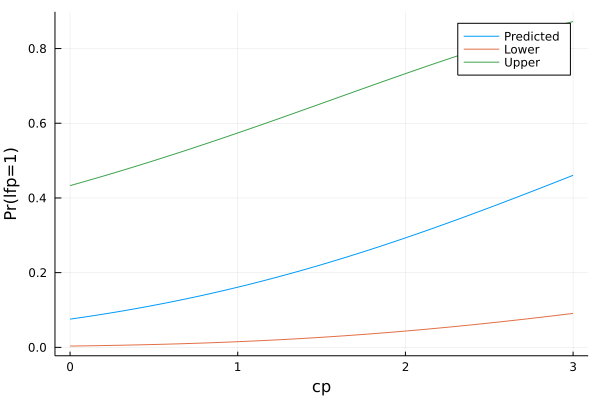

In [ ]:
plot(df_pred.cp, Matrix(prob_pred),labels=["Predicted" "Lower" "Upper"],
     xlabel="cp", ylabel="Pr(lfp=1)")

# Conclusion

We have showcased how simple it is to write Julia code and how powerful it is when it comes to scientific calculations. We have discovered that this language has the potential to overtake Python due to simple syntax with higher performance. Julia is still new to data science but I am sure it is the future of machine learning and artificial intelligence.

To be honest I am also learning new stuff about Julia every day and if you want to know more about parallel computing and deep learning using GPU or machine learning in general do look out for my other article in the future.I haven’t done more exploration on the predictive models as this is an introductory article with generalized examples. So, if you think there is more, I could do, do let me know and I will try to add it in my next article.

> You can follow me on [LinkedIn](https://www.linkedin.com/in/1abidaliawan/) and [Polywork](https://www.polywork.com/kingabzpro) where I publish article every week.

> For more information you can read [Julia: A New Age of Data Science. Learn why Julia is future of Data… | by Abid Ali Awan | Towards Data Science](https://towardsdatascience.com/julia-for-data-science-a-new-age-data-science-bf0747a94851)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=55c289bf-3e4b-4fa2-843e-c5f820a6fbba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>